In [9]:
from tes.data import Data
import numpy as np
import matplotlib.pyplot as plt

In [104]:
trace_dt=np.dtype([('raw','i4'),('filtered','i4'),('slope','i4')])

In [89]:
traces=np.fromfile('data/traces',trace_dt)

In [137]:
traces=Data.fromfile('traces',trace_dt,'teslib','channel_TB',tool='vivado')

<IPython.core.display.Javascript object>


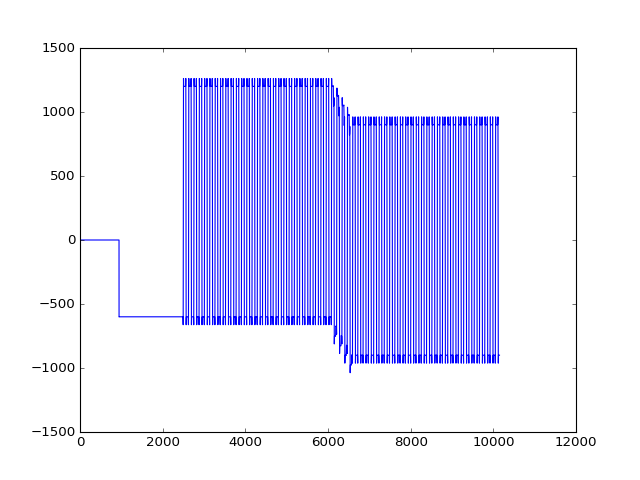

In [138]:
%matplotlib notebook
plt.plot(traces['filtered'][100:])

In [180]:
stream_dt=np.dtype([('data','u8'),('last','i4')])
stream=np.fromfile('data/stream',stream_dt)

In [196]:
stream=Data.fromfile('stream',stream_dt,'teslib','channel_TB',tool='vivado')
stream

array([(3020162560, -2613), (4503602798540800, -2663), (3020162560, -2741),
       (4503602798540800, -2791), (3020162560, -2869),
       (4503602798540800, -2919), (3020162560, -2997),
       (4503602798540800, -3047), (3020162560, -3125),
       (4503602798540800, -3175), (3020162560, -3253),
       (4503602798540800, -3303), (3020162560, -3381),
       (4503602798540800, -3431), (3020162560, -3509),
       (4503602798540800, -3559), (3020162560, -3637),
       (4503602798540800, -3687), (3020162560, -3765),
       (4503602798540800, -3815), (3020162560, -3893),
       (4503602798540800, -3943), (3020162560, -4021),
       (4503602798540800, -4071), (3020162560, -4149),
       (4503602798540800, -4199), (3020162560, -4277),
       (4503602798540800, -4327), (3020162560, -4405),
       (4503602798540800, -4455), (3020162560, -4533),
       (4503602798540800, -4583), (3020162560, -4661),
       (4503602798540800, -4711), (3020162560, -4789),
       (4503602798540800, -4839), (302016256

In [198]:
'{:08X}'.format(stream['data'][0])

'B4040600'

In [199]:
event_dt=np.dtype([('rise','>i2'),('height','>i2'),('time','>i2'),('flags','>i2')])

In [200]:
events=stream['data'].view(event_dt)

In [201]:
'{:X}'.format(events['flags'][0])

'0'

In [202]:
events['rise']

array([ 6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6,
       56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,
        6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6,
       56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,
        6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6,
       56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,
        6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6, 56,  6,
       56], dtype=int16)

In [203]:
events

array([(6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0), (56, 1213, 0, 4096),
       (6, 1204, 0, 0), (56, 1213, 0, 4096), (6, 1204, 0, 0),
       (56, 1213, 0, 4096), (6, 1204, 0, 0

In [206]:
'{:04X}'.format(events['flags'][1])

'1000'